# Домашнее задание 6: классификация текстов

В этом домашнем задании вам предстоит построить классификатор текстов!

Данные мы будем использовать из Kaggle соревнования: https://www.kaggle.com/competitions/nlp-getting-started/data Оттуда надо скачать файл train.csv. На обучающую и тестовую выборки его поделим кодом ниже, менять его не надо!

Мы будем работать с датасетом постов из твиттера. Нам предстоит решать задачу бинарной классификации - определять содержатся ли в твитте информация о настоящей катастрофе/инциденте или нет.

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.head(50)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


In [4]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.3, random_state=42)

## Задание 1 (0.5 балла)

Выведете на экран информацию о пропусках в данных. Если пропуски присутствуют заполните их пустой строкой.

In [5]:
# Число пустых значений по столбцам.
train.isnull().sum()

id             0
keyword       44
location    1760
text           0
target         0
dtype: int64

In [6]:
# Число пустых значений по столбцам.
test.isnull().sum()

id            0
keyword      17
location    773
text          0
target        0
dtype: int64

In [7]:
train_no_mis = train.fillna('')
train_no_mis.head(50)

,id,keyword,location,text,target
1186,1707,bridge%20collapse,,Ashes 2015: AustraliaÛªs collapse at Trent Br...,0
4071,5789,hail,"Carol Stream, Illinois",GREAT MICHIGAN TECHNIQUE CAMP\nB1G THANKS TO @...,1
5461,7789,police,Houston,CNN: Tennessee movie theater shooting suspect ...,1
5787,8257,rioting,,Still rioting in a couple of hours left until ...,1
7445,10656,wounds,Lake Highlands,Crack in the path where I wiped out this morni...,0
151,216,airplane%20accident,Somewhere Out There,Experts in France begin examining airplane deb...,1
915,1324,bloody,Isolated City In World Perth,'I came to kill Indians...for FUN': Video of s...,1
1305,1886,burning,,@JohnsonTionne except idk them?? it's really b...,0
2570,3685,destroy,he/him or she/her (ask),destroy the house,0
7399,10587,wounded,"Maracay y Nirgua, Venezuela",Police Officer Wounded Suspect Dead After Exch...,1


In [8]:
test_no_mis = test.fillna('')
test_no_mis.head(50)

,id,keyword,location,text,target
2644,3796,destruction,,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0
5559,7934,rainstorm,,@Calum5SOS you look like you got caught in a r...,0
1765,2538,collision,,my favorite lady came to our volunteer meeting...,1
1817,2611,crashed,,@brianroemmele UX fail of EMV - people want to...,1
6810,9756,tragedy,"Los Angeles, CA",Can't find my ariana grande shirt this is a f...,0
4398,6254,hijacking,"Athens,Greece",The Murderous Story Of AmericaÛªs First Hijac...,1


## Задание 2 (1 балл)
Давайте немного посмотрим на наши данные. Визуализируйте (где явно просят) или выведете информацию о следующем:

1. Какое распределение классов в обучающей выборке?
2. Посмотрите на колонку "keyword" - возьмите 10 наиболее встречающихся значений, постройте ступенчатую диаграмму распределения классов в зависимости от значения keyword, сделайте выводы.

In [9]:
train_no_mis.value_counts(['target'])
# Классы слегка несбалансированны.

target
0         3024
1         2305
dtype: int64

In [10]:
train_no_mis.value_counts(['keyword'], sort=True)

keyword              
                         44
damage                   36
siren                    35
wreckage                 34
fatalities               33
                         ..
forest%20fire            16
epicentre                10
inundation                7
radiation%20emergency     7
threat                    6
Length: 222, dtype: int64

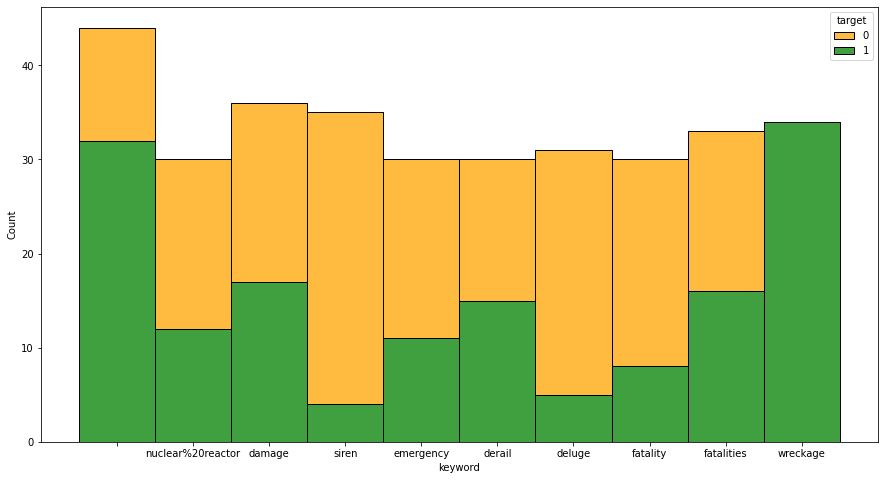

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

top_keywords = set(train_no_mis.value_counts(['keyword'], sort=True)[:10].index.get_level_values(level=0))

top_indexes = []
for i, row in train_no_mis.iterrows():
    if row['keyword'] in top_keywords:
        top_indexes.append(i)

plt.figure(figsize=(15, 8))

sns.histplot(
    train_no_mis[train_no_mis.index.isin(top_indexes)],
    x='keyword', hue='target',
    multiple='stack',
    palette=['orange', 'g']
)

plt.show()
# Число фейковых твитов слегка превосходит число твитов с реальными катастрофами.

## Задание 3 (0.5 балла) 

В этом задании предлагается объединить все три текстовых столбца в один (просто сконкатенировать cтроки) и убрать столбец с индексом.

In [12]:
to_merge = ['keyword', 'location', 'text']
to_drop = to_merge.copy()
to_drop.append('id')

train_no_mis['combined'] = train_no_mis[to_merge].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)
test_no_mis['combined'] = test_no_mis[to_merge].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)

train_combined = train_no_mis.drop(to_drop, axis=1)
test_combined = test_no_mis.drop(to_drop, axis=1)
train_combined

,target,combined
1186,0,bridge%20collapse Ashes 2015: AustraliaÛªs c...
4071,1,"hail Carol Stream, Illinois GREAT MICHIGAN TEC..."
5461,1,police Houston CNN: Tennessee movie theater s...
5787,1,rioting Still rioting in a couple of hours le...
7445,0,wounds Lake Highlands Crack in the path where ...
...,...,...
5226,0,obliteration Merica! @Eganator2000 There aren'...
5390,0,panic just had a panic attack bc I don't have...
860,0,blood Omron HEM-712C Automatic Blood Pressure...
7603,1,Officials say a quarantine is in place at an...


## Задание 4 (0.5 балла)

Далее мы будем пока работать только с train частью.

1. Предобработайте данные (train часть) с помощью CountVectorizer.
2. Какого размера получилась матрица?


In [13]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
train_tokenized = vectorizer.fit_transform(train_combined['combined'])
train_tokenized.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [14]:
train_tokenized.shape

(5329, 18455)

## Задание 5 (1 балл)

В предыдущем пункте у вас должна была получиться достаточно большая матрица.
Если вы взгляните на текст, то увидете, что там есть множество специальных символов, ссылок и прочего мусора.

Давайте также посмотрим на словарь, который получился в результате построения CountVectorizer, его можно найти в поле vocabulary_ инстанса этого класса. Давайте напишем функцию, которая печает ответы на следующие вопросы:

1. Найдите в этом словаре все слова, которые содержат цифры. Сколько таких слов нашлось?

2. Найдите все слова, которые содержат символы пунктуации. Сколько таких слов нашлось? 

3. Сколько хэштегов (токен начинается на #) и упоминаний (токен начинается на @) осталось в словаре?

In [15]:
import string
import re


def tokenized_info(voc):
    has_digits = list()
    has_punct = list()
    hash_ate = list()

    for word in voc.keys():
        if re.search('\d+', word) is not None:
            has_digits.append(word)

        if any([letter in string.punctuation for letter in word]):
            has_punct.append(word)

        if word[0] == '@' or word[0] == '#':
            hash_ate.append(word)

    print('Number of words with digits inside:', len(has_digits))
    print('Number of words with punctuation inside:', len(has_punct))
    print('Number of words starts with # or @:', len(hash_ate))


In [16]:
tokenized_info(vectorizer.vocabulary_)

Number of words with digits inside: 3812
Number of words with punctuation inside: 315
Number of words starts with # or @: 0


## Задание 6 (0.5 балла)

Вспомним, что на семинаре по текстам мы узнали, что в nltk есть специальный токенизатор для текстов - TweetTokenizer. Попробуем применить CountVectorizer с этим токенизатором. Ответьте на все вопросы из предыдущего пункта для TweetTokenizer и сравните результаты.

In [17]:
from nltk.tokenize import TweetTokenizer

# Чтобы узнать, какие параметры есть у этого токенайзера - используйте help(TweetTokenizer)
# Для того, чтобы передать токенайзер в CountVectorizer используйте параметр tokenizer
help(TweetTokenizer)

Help on class TweetTokenizer in module nltk.tokenize.casual:

class TweetTokenizer(nltk.tokenize.api.TokenizerI)
 |  TweetTokenizer(preserve_case=True, reduce_len=False, strip_handles=False, match_phone_numbers=True)
 |  
 |  Tokenizer for tweets.
 |  
 |      >>> from nltk.tokenize import TweetTokenizer
 |      >>> tknzr = TweetTokenizer()
 |      >>> s0 = "This is a cooool #dummysmiley: :-) :-P <3 and some arrows < > -> <--"
 |      >>> tknzr.tokenize(s0)
 |      ['This', 'is', 'a', 'cooool', '#dummysmiley', ':', ':-)', ':-P', '<3'
 |      , 'and', 'some', 'arrows', '<', '>', '->', '<--']
 |  
 |  Examples using `strip_handles` and `reduce_len parameters`:
 |  
 |      >>> tknzr = TweetTokenizer(strip_handles=True, reduce_len=True)
 |      >>> s1 = '@remy: This is waaaaayyyy too much for you!!!!!!'
 |      >>> tknzr.tokenize(s1)
 |      [':', 'This', 'is', 'waaayyy', 'too', 'much', 'for', 'you', '!', '!', '!']
 |  
 |  Method resolution order:
 |      TweetTokenizer
 |      nltk.toke

In [18]:
tknz = TweetTokenizer()

vectorizer = CountVectorizer(tokenizer=tknz.tokenize)
train_tokenized = vectorizer.fit_transform(train_combined['combined'])
train_tokenized.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [19]:
tokenized_info(vectorizer.vocabulary_)
# Данный токенайзер не разбивает слова при встрече твиттерных символов, что в нашем случае очень полезно.
# Кроме того, он пропускает множество слов с пунктуацией внутри.

Number of words with digits inside: 3939
Number of words with punctuation inside: 7338
Number of words starts with # or @: 3149


## Задание 7 (2 балла)

В scikit-learn мы можем оценивать процесс подсчета матрицы через CountVectorizer. У CountVectorizer, как и у других наследников \_VectorizerMixin, есть аргумент tokenizer и preprocessor. preprocessor применится в самом начале к каждой строке вашего датасета, tokenizer же должен принять строку и вернуть токены.
Давайте напишем кастомный токенайзер, которые сделает все, что нам нужно: 

0. Приведет все буквы к нижнему регистру
1. Разобьет текст на токены с помощью TweetTokenizer из пакета nltk
2. Удалит все токены содержащие не латинские буквы, кроме смайликов (будем считать ими токены содержащие только пунктуацию и, как минимум, одну скобочку) и хэштегов, которые после начальной # содержат только латинские буквы.
3. Удалит все токены, которые перечислены в nltk.corpus.stopwords.words('english')
4. Проведет стемминг с помощью SnowballStemmer

Продемонстрируйте работу вашей функции на первых десяти текстах в обучающей выборке.

In [20]:
import nltk
from typing import List
from nltk.stem import SnowballStemmer

nltk.download('stopwords')


class SupaTokenizer:
    def __init__(self):
        self.__personal_tweet_tokenizer = TweetTokenizer()
        self.__personal_snowball = SnowballStemmer('english')

    def __is_smile(self, word):
        smiling_syms = {'{', '}', '[', ']', '(', ')'}
        has_smile = False
        punct_only = True
        for letter in word:
            if letter not in string.punctuation:
                punct_only = False
            if letter in smiling_syms:
                has_smile = True

        return has_smile and punct_only

    def __is_hashtag_or_latin_only(self, word):
        if word[0] == '#':
            word = word[1:]

        return all([letter in string.ascii_letters for letter in word])

    def tokenize(self, text: str) -> List[str]:
        """Tokenize the input text.

        :param text: str
        :rtype: list(str)
        :return: a tokenized list of strings; joining this list returns\
        the original string if `preserve_case=False`.
        """

        text_twtokenized = self.__personal_tweet_tokenizer.tokenize(text.lower())
        clear_text = list()

        for word in text_twtokenized:
            if self.__is_smile(word) or self.__is_hashtag_or_latin_only(
                    word) and word not in nltk.corpus.stopwords.words('english'):
                clear_text.append(self.__personal_snowball.stem(word))

        return clear_text

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dm1tr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
supa_tokenizer = SupaTokenizer()
for i in range(10):
    print(supa_tokenizer.tokenize(train_combined.iloc[i]['combined']))

['bridg', 'ash', 'australia', 'collaps', 'trent', 'bridg', 'among', 'worst', 'histori', 'england', 'bundl', 'australia']
['hail', 'carol', 'stream', 'illinoi', 'great', 'michigan', 'techniqu', 'camp', 'thank', '#goblu', '#wrestleon']
['polic', 'houston', 'cnn', 'tennesse', 'movi', 'theater', 'shoot', 'suspect', 'kill', 'polic']
['riot', 'still', 'riot', 'coupl', 'hour', 'left', 'class']
['wound', 'lake', 'highland', 'crack', 'path', 'wipe', 'morn', 'beach', 'run', 'surfac', 'wound', 'left', 'elbow', 'right', 'knee']
['airplan', 'somewher', 'expert', 'franc', 'begin', 'examin', 'airplan', 'debri', 'found', 'reunion', 'island', 'french', 'air', 'accid', 'expert', '#mlb']
['bloodi', 'isol', 'citi', 'world', 'perth', 'came', 'kill', 'indian', 'fun', 'video', 'smirk', 'remorseless', 'pakistani', 'killer', 'show', 'boast']
['burn', 'except', 'idk', 'realli', 'burn']
['destroy', '(', 'ask', ')', 'destroy', 'hous']
['wound', 'maracay', 'nirgua', 'venezuela', 'polic', 'offic', 'wound', 'suspect

## Задание 8 (1 балл)

1. Примените CountVectorizer с реализованным выше токенизатором к обучающим и тестовым выборкам.
2. Обучите LogisticRegression на полученных признаках.
3. Посчитайте метрику f1-score на тестовых данных.

In [22]:
tknz = SupaTokenizer()

vectorizer = CountVectorizer(tokenizer=tknz.tokenize)
train_tokenized = vectorizer.fit_transform(train_combined['combined'])
train_tokenized.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [23]:
test_tokenized = vectorizer.transform(test_combined['combined'])
test_tokenized.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [24]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(train_tokenized.toarray(), train_combined['target'])
y_pred = clf.predict(test_tokenized.toarray())

In [25]:
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

print('F1 score on test:', f1_score(test_combined['target'], y_pred))
print()
print(classification_report(test_combined['target'], y_pred))

F1 score on test: 0.752017213555675

              precision    recall  f1-score   support

           0       0.81      0.85      0.83      1318
           1       0.78      0.72      0.75       966

    accuracy                           0.80      2284
   macro avg       0.80      0.79      0.79      2284
weighted avg       0.80      0.80      0.80      2284



## Задание 9 (1 балл)

1. Повторите 7 задание, но с tf-idf векторизатором. Как изменилось качество?
2. Мы можем еще сильнее уменьшить размер нашей матрицы, если отбросим значения df близкие к единице. Скорее всего такие слова не несут много информации о категории, так как встречаются достаточно часто. Ограничьте максимальный df в параметрах TfIdfVectorizer, поставьте верхнюю границу равную 0.9. Как изменился размер матрицы, как изменилось качество?
3. Также мы можем уменьшить размер матрицы, удаляя слова со слишком маленьким df. Удалось ли добиться улучшения качества? 

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

tknz = SupaTokenizer()
vectorizer = TfidfVectorizer(tokenizer=tknz.tokenize, max_df=0.9)

train_tfidf_tokenized = vectorizer.fit_transform(train_combined['combined'])
train_tfidf_tokenized.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [27]:
test_tfidf_tokenized = vectorizer.transform(test_combined['combined'])
test_tfidf_tokenized.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [28]:
clf = LogisticRegression()
clf.fit(train_tfidf_tokenized.toarray(), train_combined['target'])
y_pred = clf.predict(test_tfidf_tokenized.toarray())

In [29]:
print('F1 score on test:', f1_score(test_combined['target'], y_pred))
print()
print(classification_report(test_combined['target'], y_pred))

F1 score on test: 0.7412353923205343

              precision    recall  f1-score   support

           0       0.79      0.87      0.83      1318
           1       0.80      0.69      0.74       966

    accuracy                           0.80      2284
   macro avg       0.80      0.78      0.79      2284
weighted avg       0.80      0.80      0.79      2284



In [30]:
print('Tfidf size', train_tfidf_tokenized.shape)
print('Count size', train_tokenized.shape)
# Видно, что ничего не поменялось, значит нет слов, которые так часто встречаются.
# Опытным путем было выяснено, что max_df начинал давать эффект в районе 0.04.

Tfidf size (5329, 10486)
Count size (5329, 10486)


In [31]:
tknz = SupaTokenizer()
vectorizer = TfidfVectorizer(tokenizer=tknz.tokenize, max_df=0.9, min_df=0.0002)

train_tfidf_tokenized = vectorizer.fit_transform(train_combined['combined'])
test_tfidf_tokenized = vectorizer.transform(test_combined['combined'])

clf = LogisticRegression()
clf.fit(train_tfidf_tokenized.toarray(), train_combined['target'])
y_pred = clf.predict(test_tfidf_tokenized.toarray())

print('F1 score on test:', f1_score(test_combined['target'], y_pred))
print()
print(classification_report(test_combined['target'], y_pred))
print(train_tfidf_tokenized.shape)

# Слегка подняли f-меру путем указания min_df.

F1 score on test: 0.7463848720800891

              precision    recall  f1-score   support

           0       0.80      0.88      0.84      1318
           1       0.81      0.69      0.75       966

    accuracy                           0.80      2284
   macro avg       0.80      0.79      0.79      2284
weighted avg       0.80      0.80      0.80      2284

(5329, 4527)


## Задание 10 (1 балл)

Еще один популяпный трюк, который позволит уменьшить количество признаков называется hashing trick. Его суть в том, то мы случайно группируем признаки ииии  ..... складываем их! А потом удаляем исходные признаки. В итоге все наши признаки это просто суммы исходных. Звучит странно, но это отлично работает. Давайте проверим этот трюк в нашем сеттинге.
Также при таком подходе вам не нужно хранить словарь token->index, что тоже иногда полезно.

1. Повторите задание 7 с HashingVectorizer, укажите количество фичей равное 5000.
2. Какой из подходов показал самый высокий результат?

In [32]:
from sklearn.feature_extraction.text import HashingVectorizer

tknz = SupaTokenizer()
vectorizer = HashingVectorizer(tokenizer=supa_tokenizer.tokenize, n_features=5000)

train_hash_tokenized = vectorizer.fit_transform(train_combined['combined'])
train_hash_tokenized.toarray()

c:\users\dm1tr\desktop\ida-ml\venv\lib\site-packages\sklearn\feature_extraction\text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.30151134],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [33]:
test_hash_tokenized = vectorizer.transform(test_combined['combined'])
test_hash_tokenized.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [34]:
clf = LogisticRegression()
clf.fit(train_hash_tokenized.toarray(), train_combined['target'])
y_pred = clf.predict(test_hash_tokenized.toarray())

In [35]:
print('F1 score on test:', f1_score(test_combined['target'], y_pred))
print()
print(classification_report(test_combined['target'], y_pred))
print(train_hash_tokenized.shape)

# Результат хуже двух предыдущих ((
# В целом Count и Tfidf показывают примерно одинаковый (кто-то где-то лучше, кто-то где-то хуже) результат.

F1 score on test: 0.7190635451505016

              precision    recall  f1-score   support

           0       0.78      0.86      0.82      1318
           1       0.78      0.67      0.72       966

    accuracy                           0.78      2284
   macro avg       0.78      0.76      0.77      2284
weighted avg       0.78      0.78      0.78      2284

(5329, 5000)


## Задание 11 (1 балл)

В этом задании нужно добиться f1 меры хотя в 0.75 на тестовых данных.

In [36]:
vectorizer = CountVectorizer(tokenizer=tknz.tokenize)

train_count_tokenized = vectorizer.fit_transform(train_combined['combined'])
test_count_tokenized = vectorizer.transform(test_combined['combined'])

clf = LogisticRegression()
clf.fit(train_count_tokenized.toarray(), train_combined['target'])
y_pred = clf.predict(test_count_tokenized.toarray())

print('F1 score on test:', f1_score(test_combined['target'], y_pred))
print()
print(classification_report(test_combined['target'], y_pred))

# Тут уже f-мера 0.75.
# Попробуем поиграться с n-граммами.

F1 score on test: 0.752017213555675

              precision    recall  f1-score   support

           0       0.81      0.85      0.83      1318
           1       0.78      0.72      0.75       966

    accuracy                           0.80      2284
   macro avg       0.80      0.79      0.79      2284
weighted avg       0.80      0.80      0.80      2284



In [37]:
import itertools

combs_of = [1, 2, 3]
combs = list()
combs.append((1, 1))
combs += itertools.combinations(combs_of, 2)

for co in combs:
    vectorizer = CountVectorizer(tokenizer=tknz.tokenize, ngram_range=co)

    train_count_tokenized = vectorizer.fit_transform(train_combined['combined'])
    test_count_tokenized = vectorizer.transform(test_combined['combined'])

    clf = LogisticRegression()
    clf.fit(train_count_tokenized.toarray(), train_combined['target'])
    y_pred = clf.predict(test_count_tokenized.toarray())

    print('F1 score on test:', f1_score(test_combined['target'], y_pred))
    print()
    print(classification_report(test_combined['target'], y_pred))

# Замечен неплохой отрицательный рост)

F1 score on test: 0.752017213555675

              precision    recall  f1-score   support

           0       0.81      0.85      0.83      1318
           1       0.78      0.72      0.75       966

    accuracy                           0.80      2284
   macro avg       0.80      0.79      0.79      2284
weighted avg       0.80      0.80      0.80      2284

F1 score on test: 0.7505470459518598

              precision    recall  f1-score   support

           0       0.80      0.87      0.83      1318
           1       0.80      0.71      0.75       966

    accuracy                           0.80      2284
   macro avg       0.80      0.79      0.79      2284
weighted avg       0.80      0.80      0.80      2284

F1 score on test: 0.745969983324069

              precision    recall  f1-score   support

           0       0.80      0.88      0.83      1318
           1       0.81      0.69      0.75       966

    accuracy                           0.80      2284
   macro avg    

In [38]:
from sklearn.linear_model import SGDClassifier

combs_of = [1, 2, 3]
combs = list()
combs.append((1, 1))
combs += itertools.combinations(combs_of, 2)

for co in combs:
    vectorizer = CountVectorizer(tokenizer=TweetTokenizer().tokenize, ngram_range=co)

    train_count_tokenized = vectorizer.fit_transform(train_combined['combined'])
    test_count_tokenized = vectorizer.transform(test_combined['combined'])

    clf = SGDClassifier()
    clf.fit(train_count_tokenized.toarray(), train_combined['target'])
    y_pred = clf.predict(test_count_tokenized.toarray())

    print('F1 score on test:', f1_score(test_combined['target'], y_pred))
    print()
    print(classification_report(test_combined['target'], y_pred))

# SVM еще хуже(
# Похоже log-loss с униграммами работает лучше всего с его-то f-мерой > 0.75.

F1 score on test: 0.7180823345492444

              precision    recall  f1-score   support

           0       0.79      0.80      0.80      1318
           1       0.72      0.71      0.72       966

    accuracy                           0.76      2284
   macro avg       0.76      0.76      0.76      2284
weighted avg       0.76      0.76      0.76      2284

F1 score on test: 0.7308337996642418

              precision    recall  f1-score   support

           0       0.79      0.87      0.83      1318
           1       0.80      0.68      0.73       966

    accuracy                           0.79      2284
   macro avg       0.79      0.77      0.78      2284
weighted avg       0.79      0.79      0.79      2284

F1 score on test: 0.7417943107221007

              precision    recall  f1-score   support

           0       0.80      0.86      0.83      1318
           1       0.79      0.70      0.74       966

    accuracy                           0.79      2284
   macro avg  

In [39]:
from sklearn.preprocessing import MaxAbsScaler, RobustScaler, MinMaxScaler

tknz = SupaTokenizer()
vectorizer = CountVectorizer(tokenizer=tknz.tokenize)

train_count_tokenized = vectorizer.fit_transform(train_combined['combined'])
test_count_tokenized = vectorizer.transform(test_combined['combined'])

scaler = MaxAbsScaler()
train_count_tokenized_scaled = scaler.fit_transform(train_count_tokenized.toarray())
test_count_tokenized_scaled = scaler.transform(test_count_tokenized.toarray())

clf = LogisticRegression()
clf.fit(train_count_tokenized_scaled, train_combined['target'])
y_pred = clf.predict(test_count_tokenized_scaled)

print('F1 score on test:', f1_score(test_combined['target'], y_pred))
print()
print(classification_report(test_combined['target'], y_pred))

# В конце концов масштабириуем. Перебрал скалеры, все равно не нашел тот, что повысит f-меру.
# Возможно, комбинация скалеров, токенайзеров, классификаторов, кол-ва n-грамм и даст лучший результат,
# но пока что оставим первый вариант.

F1 score on test: 0.7433333333333335

              precision    recall  f1-score   support

           0       0.80      0.87      0.83      1318
           1       0.80      0.69      0.74       966

    accuracy                           0.80      2284
   macro avg       0.80      0.78      0.79      2284
weighted avg       0.80      0.80      0.80      2284



In [40]:
vectorizer = CountVectorizer(tokenizer=tknz.tokenize)

train_count_tokenized = vectorizer.fit_transform(train_combined['combined'])
test_count_tokenized = vectorizer.transform(test_combined['combined'])

clf = LogisticRegression()
clf.fit(train_count_tokenized.toarray(), train_combined['target'])
y_pred = clf.predict(test_count_tokenized.toarray())

print('F1 score on test:', f1_score(test_combined['target'], y_pred))
print()
print(classification_report(test_combined['target'], y_pred))

# Поэтому оставим этот (скучный -_-) вариант.

F1 score on test: 0.752017213555675

              precision    recall  f1-score   support

           0       0.81      0.85      0.83      1318
           1       0.78      0.72      0.75       966

    accuracy                           0.80      2284
   macro avg       0.80      0.79      0.79      2284
weighted avg       0.80      0.80      0.80      2284

